In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import accuracy_score

# import tensorflow as tf
# from tensorflow.keras.models import Sequential, Model, load_model 
# from tensorflow.keras.layers import Dense, Flatten, Input, concatenate, Conv2D, MaxPool2D, Dropout, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import SGD, Adam, RMSprop
# from tensorflow.keras.utils import to_categorical

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import pyperclip

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [3]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud

# 워드 클라우드

## 떡볶이

In [4]:
tpk=pd.read_csv("../data/tpk_processed_02.csv", index_col = 0)
tpk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2000 non-null   object 
 1   Contents      1995 non-null   object 
 2   Tags          1817 non-null   object 
 3   Likes         2000 non-null   float64
 4   Scaled_Likes  2000 non-null   float64
 5   Tag_sum       2000 non-null   int64  
 6   Tag_count     2000 non-null   int64  
 7   Tag_rate      1817 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 140.6+ KB


In [5]:
tpk["Contents"].fillna("", inplace= True)
tpk["Tags"].fillna("", inplace= True)

In [6]:
Content = []
for i in tpk["Contents"]:
    ex = i[2:-2].split(" ")
    for j in ex:
        Content.append(j)
Content

['',
 '5대',
 '떡볶이',
 '중에',
 '한곳인',
 '현선이네',
 '20년전',
 '포장마차에서',
 '시작해서',
 '많은',
 '지점이',
 '생긴',
 '현선이네떡볶이',
 '소주',
 '맥주',
 '판매하셔서',
 '분식',
 '에',
 '술',
 '마실수',
 '있는',
 '귀한',
 '집',
 '생맥주',
 '있길래',
 '시켰는데',
 '생맥주',
 '맛있어요',
 '현선이네본점',
 '우리집이랑',
 '가까웠으면',
 '맨날',
 '혼술',
 '했을듯',
 '가깝지',
 '않아서',
 '다행이다',
 '끓여먹는',
 '즉석떡볶이',
 '랑',
 '학교앞',
 '떡볶이',
 '느낌의',
 '판떡볶이로',
 '2가지라',
 '취향껏',
 '선택',
 '가능하고',
 '판떡볶이는',
 '밀떡볶이',
 '에',
 '매운맛',
 '중간맛',
 '순한맛으로',
 '선택',
 '가능한데',
 '매운맛은',
 '평소',
 '엽떡',
 '매운맛',
 '먹는',
 '저에게도',
 '지인짜',
 '매워욬생맥이',
 '땡기는',
 '맛떡볶이맛집',
 '이지만',
 '튀김',
 '오뎅',
 '순대',
 '김밥',
 '사이드도',
 '다양해서',
 '너무',
 '좋아요',
 '다',
 '맛있지만',
 '순대는',
 '한번더',
 '추가해서',
 '먹었을',
 '정도매장',
 '웨이팅도',
 '있고',
 '포장도',
 '많지만',
 '홀',
 '손님',
 '이상으로',
 '배달이',
 '진짜',
 '많던데',
 '현선이네용산본점',
 '가까우신',
 '분들',
 '너무',
 '부럽서울',
 '서울맛집',
 '용산',
 '용산맛집',
 '용산역',
 '용산역맛집',
 '먜슐랭',
 '먜슐랭용산',
 '먜슐랭떡',
 '고에',
 '쟁여두고',
 '먹고싶은',
 '빨간',
 '무침군만두',
 '솔직히',
 '여기는',
 '이거',
 '먹으러',
 '가는거죠이수',
 '애플하우스',
 '즉석떡뽁이',
 '맛집이지만',
 '무침군만두가',
 '워낙',
 '유명해서무침

In [7]:
from collections import Counter
Content_count = Counter(Content)
Content_count

Counter({'': 4239,
         '5대': 1,
         '떡볶이': 1426,
         '중에': 9,
         '한곳인': 1,
         '현선이네': 1,
         '20년전': 1,
         '포장마차에서': 3,
         '시작해서': 2,
         '많은': 27,
         '지점이': 1,
         '생긴': 3,
         '현선이네떡볶이': 1,
         '소주': 17,
         '맥주': 30,
         '판매하셔서': 1,
         '분식': 162,
         '에': 31,
         '술': 13,
         '마실수': 1,
         '있는': 108,
         '귀한': 5,
         '집': 26,
         '생맥주': 5,
         '있길래': 4,
         '시켰는데': 7,
         '맛있어요': 20,
         '현선이네본점': 1,
         '우리집이랑': 1,
         '가까웠으면': 1,
         '맨날': 5,
         '혼술': 6,
         '했을듯': 1,
         '가깝지': 1,
         '않아서': 6,
         '다행이다': 1,
         '끓여먹는': 3,
         '즉석떡볶이': 48,
         '랑': 15,
         '학교앞': 9,
         '느낌의': 2,
         '판떡볶이로': 1,
         '2가지라': 1,
         '취향껏': 9,
         '선택': 5,
         '가능하고': 1,
         '판떡볶이는': 1,
         '밀떡볶이': 13,
         '매운맛': 30,
         '중간맛': 7,
         '순한맛으로': 1,

In [8]:
rank_tpk = Content_count.most_common()
rank_tpk

[('', 4239),
 ('떡볶이', 1426),
 ('수', 191),
 ('너무', 181),
 ('먹스타그램', 179),
 ('더', 167),
 ('분식', 162),
 ('맛집', 154),
 ('이', 148),
 ('떡볶이맛집', 145),
 ('다', 130),
 ('떡', 129),
 ('맛스타그램', 127),
 ('맛', 123),
 ('잘', 117),
 ('먹고', 116),
 ('순대', 115),
 ('맛있는', 114),
 ('있는', 108),
 ('일상', 104),
 ('많이', 103),
 ('넣고', 96),
 ('진짜', 92),
 ('먹는', 88),
 ('좋아요', 88),
 ('튀김', 86),
 ('떡볶이를', 86),
 ('koreanfood', 86),
 ('먹스타', 84),
 ('정말', 83),
 ('한', 81),
 ('어묵', 81),
 ('함께', 80),
 ('먹팔', 78),
 ('엽떡', 77),
 ('맛있게', 77),
 ('김밥', 75),
 ('같이', 75),
 ('asmrfood', 73),
 ('것', 72),
 ('저녁', 72),
 ('eatingasmr', 72),
 ('eatingsounds', 72),
 ('맛이', 71),
 ('또', 70),
 ('먹방', 70),
 ('mukbangasmr', 70),
 ('프로필', 69),
 ('집밥', 67),
 ('떡볶이는', 65),
 ('맞팔', 65),
 ('바로', 64),
 ('그', 63),
 ('food', 63),
 ('소통', 62),
 ('밀떡', 59),
 ('때', 58),
 ('은', 58),
 ('꼭', 57),
 ('이벤트', 57),
 ('오늘', 56),
 ('로제떡볶이', 56),
 ('점심', 56),
 ('오뎅', 55),
 ('떡볶이가', 54),
 ('떡볶이그램', 53),
 ('먹으면', 51),
 ('국물떡볶이', 50),
 ('및', 49),
 ('만들어', 49),
 ('for',

(-0.5, 299.5, 299.5, -0.5)

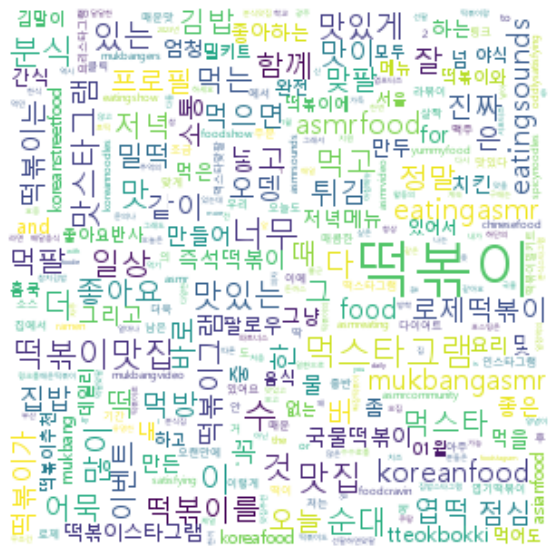

In [9]:
# stopwords = set(STOPWORDS)
# stopwords.update([]) # 제거할 단어들

wc_tpk1 = WordCloud(max_font_size=50, background_color="white", max_words=700, #stopwords=stopwords,
                    width=300, height=300,
                    font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(rank_tpk))

plt.figure(figsize=(10,10))
plt.imshow(wc_tpk1, interpolation="bilinear")
plt.axis("off")

(-0.5, 299.5, 299.5, -0.5)

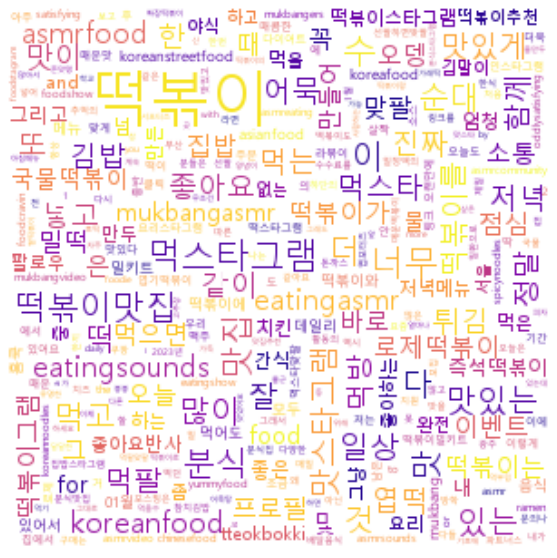

In [26]:
# stopwords = set(STOPWORDS)
# stopwords.update([]) # 제거할 단어들


wc_tpk2 = WordCloud(max_font_size=50, background_color="white", max_words=700, #stopwords=stopwords,
                    width=300, height=300, colormap = 'plasma',
                    font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(rank_tpk))

plt.figure(figsize=(10,10))
plt.imshow(wc_tpk2, interpolation="bilinear")
plt.axis("off")

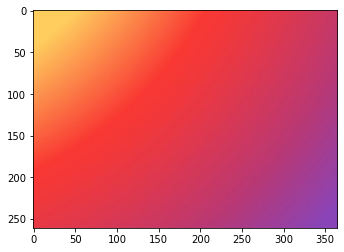

In [14]:
from PIL import Image

# insta_mask = np.array(Image.open("C:\\Users\\user\\BIGDATA analysis\\analysis\\data\\data\\WORDCLOUD\\wordcloud\\korea_map.jpg"))
insta_mask = np.array(Image.open("../data/insta.jpg"))

plt.imshow(insta_mask)

ValueError: Size must be a tuple

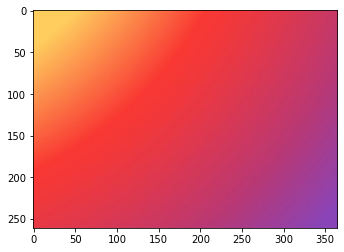

In [13]:
### 사이즈 이슈......
from PIL import Image

# insta_mask = np.array(Image.open("../data/insta.jpg"))
# plt.imshow(insta_mask)

# mask = Image.new("RGB", insta_mask.size, (255,255,255))
# mask.paste(insta_mask,insta_mask)
# mask = np.array(mask)

In [15]:
import wordcloud

insta_mask = np.array(Image.open("../data/insta.png"))
#insta_mask = np.array(Image.open("C:\\Users\\user\\BIGDATA analysis\\analysis\\data\\data\\WORDCLOUD\\wordcloud\\korea_map.jpg"))


# wc = WordCloud(max_font_size=40, background_color="white", 
#                mask=alice_mask, stopwords=STOPWORDS, max_words=500).generate(text)

wc_tpk1 = WordCloud(max_font_size=50, background_color="white", max_words=1000, mask=insta_mask,
                    width=200, height=200,
                    font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(rank_text))

image_colors = wordcloud.ImageColorGenerator(insta_mask)

plt.figure(figsize=(10, 10))
plt.imshow(wc_tpk1.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

FileNotFoundError: [Errno 2] No such file or directory: '../data/insta.png'

## 스시

In [16]:
sushi=pd.read_csv("../data/sushi_processed_02.csv", index_col = 0)
sushi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2000 non-null   object 
 1   Contents      1981 non-null   object 
 2   Tags          1787 non-null   object 
 3   Likes         2000 non-null   float64
 4   Scaled_Likes  2000 non-null   float64
 5   Tag_sum       2000 non-null   int64  
 6   Tag_count     2000 non-null   int64  
 7   Tag_rate      1787 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 140.6+ KB


In [17]:
sushi["Contents"].fillna("", inplace= True)
sushi["Tags"].fillna("", inplace= True)

In [20]:
Content = []
for i in sushi["Contents"]:
    ex = i[2:-2].split(" ")
    for j in ex:
        Content.append(j)
Content

['rt12017121023812sushihokkaidohokkaidotripsapporo2023poro',
 'koiramenstokyo',
 '',
 '',
 'hinasushiofficial',
 '',
 '',
 '',
 'koibuminikuyoko',
 '75chacha1943',
 '75chacharodeo',
 '75chacha',
 '',
 '',
 '',
 '',
 '',
 '75chacha',
 '',
 '',
 '물',
 '귀신',
 '국민들',
 '주목친애하는',
 '국민여러분',
 '먹통령입니다오늘',
 '저희가',
 '회담을',
 '나눌',
 '곳은',
 '미자씨',
 '입니다연남동에',
 '위치한',
 '이곳',
 '요리주점은다양한',
 '바다친구들을',
 '맛있게',
 '먹을',
 '수',
 '있는',
 '곳입니다랍스타',
 '오징어',
 '가리비',
 '새우',
 '전복',
 '등',
 '여기가',
 '연남동인지',
 '바닷속인지',
 '헷갈릴정도입니다',
 '진짜',
 '해산물',
 '끝판왕',
 '해산물에',
 '환장하는',
 '해산물',
 '귀신들은',
 '당장',
 '달려가야합니다',
 '랍스타',
 '위에',
 '치즈',
 '잔뜩',
 '올려',
 '토치로',
 '지져주셔서',
 '불쇼',
 '1열',
 '관람할',
 '수',
 '있습니다',
 '입도',
 '즐거운데',
 '눈도',
 '즐거워요연남동에서',
 '일본도',
 '다녀올',
 '수',
 '있어요',
 '코보레스시는',
 '알록달록한',
 '회를',
 '산더미로',
 '쌓아주시는데',
 '비주얼도',
 '예뻐죽겠는데',
 '쫄깃한',
 '식감이',
 '제정신',
 '아니에요',
 '게다가',
 '이곳엔',
 '파스타도',
 '있어요',
 '성게알어란파스타는',
 '우니',
 '좋아하시는',
 '분들에게',
 '대추천너무',
 '맛있어서',
 '우니먹다가',
 '울게될지도',
 '몰라요국민여러분',
 '연남동에서',
 '해산물파티하고',
 '싶은분들은',
 '바

In [21]:
from collections import Counter
Content_count = Counter(Content)
Content_count

Counter({'rt12017121023812sushihokkaidohokkaidotripsapporo2023poro': 1,
         'koiramenstokyo': 1,
         '': 4104,
         'hinasushiofficial': 1,
         'koibuminikuyoko': 1,
         '75chacha1943': 1,
         '75chacharodeo': 1,
         '75chacha': 2,
         '물': 3,
         '귀신': 1,
         '국민들': 1,
         '주목친애하는': 1,
         '국민여러분': 1,
         '먹통령입니다오늘': 1,
         '저희가': 5,
         '회담을': 1,
         '나눌': 3,
         '곳은': 6,
         '미자씨': 1,
         '입니다연남동에': 1,
         '위치한': 13,
         '이곳': 3,
         '요리주점은다양한': 1,
         '바다친구들을': 1,
         '맛있게': 45,
         '먹을': 27,
         '수': 169,
         '있는': 99,
         '곳입니다랍스타': 1,
         '오징어': 3,
         '가리비': 7,
         '새우': 20,
         '전복': 17,
         '등': 27,
         '여기가': 3,
         '연남동인지': 1,
         '바닷속인지': 1,
         '헷갈릴정도입니다': 1,
         '진짜': 58,
         '해산물': 12,
         '끝판왕': 1,
         '해산물에': 1,
         '환장하는': 1,
         '귀신들은': 1,
         '당장': 2

In [22]:
rank_sushi = Content_count.most_common()
rank_sushi

[('', 4104),
 ('스시', 1131),
 ('혜화역맛집', 480),
 ('초밥', 357),
 ('초밥맛집', 330),
 ('서울맛집', 257),
 ('맛집', 247),
 ('일상그램', 243),
 ('대학로초밥', 240),
 ('대학로스시마시따', 240),
 ('대학로데이트', 240),
 ('대학로연극', 240),
 ('대학로스시', 240),
 ('대학로맛집', 240),
 ('대학로카페', 240),
 ('혜화역스시', 240),
 ('혜화역초밥', 240),
 ('혜화역연극', 240),
 ('혜화역데이트', 240),
 ('사주잘보는곳', 240),
 ('타로점', 240),
 ('사주운세', 240),
 ('사주카페', 240),
 ('사주상담', 240),
 ('서울대학교병원', 240),
 ('대학로스시마', 240),
 ('오마카세', 238),
 ('sushi', 196),
 ('너무', 178),
 ('수', 169),
 ('스시오마카세', 118),
 ('먹스타그램', 116),
 ('더', 114),
 ('잘', 113),
 ('다', 113),
 ('맛스타그램', 112),
 ('있는', 99),
 ('좋은', 93),
 ('정말', 89),
 ('스시맛집', 86),
 ('많이', 79),
 ('이', 78),
 ('또', 74),
 ('것', 73),
 ('스시야', 71),
 ('먹고', 68),
 ('한', 68),
 ('일식', 67),
 ('사시미', 66),
 ('함께', 64),
 ('맛있는', 63),
 ('food', 63),
 ('맛집추천', 61),
 ('일상', 59),
 ('진짜', 58),
 ('사케', 58),
 ('회', 58),
 ('좋아요', 57),
 ('먹스타', 56),
 ('먹방', 56),
 ('연어', 56),
 ('참치', 56),
 ('일본', 55),
 ('그', 52),
 ('foodie', 51),
 ('및', 49),
 ('음식', 49),
 ('sash

(-0.5, 199.5, 199.5, -0.5)

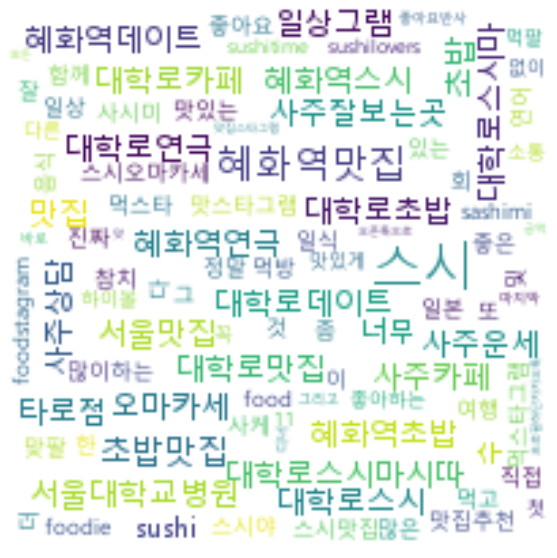

In [29]:
wc_sushi1 = WordCloud(max_font_size=30, background_color="white", max_words=800, #stopwords=stopwords,
                    width=200, height=200,
                    font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(rank_sushi))

plt.figure(figsize=(10,10))
plt.imshow(wc_sushi1, interpolation="bilinear")
plt.axis("off")

(-0.5, 299.5, 299.5, -0.5)

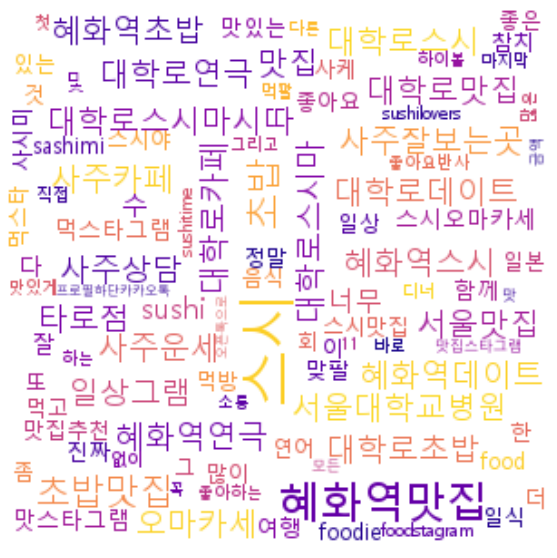

In [25]:
# stopwords = set(STOPWORDS)
# stopwords.update([]) # 제거할 단어들


wc_tpk2 = WordCloud(max_font_size=50, background_color="white", max_words=700, #stopwords=stopwords,
                    width=300, height=300, colormap = 'plasma',
                    font_path="C:\\Windows\\Fonts\\malgun.ttf").generate_from_frequencies(dict(rank_sushi))

plt.figure(figsize=(10,10))
plt.imshow(wc_tpk2, interpolation="bilinear")
plt.axis("off")